# Leer base de datos

Archivo para probar la lectura de los datos de [UC Irvine ML Repository](https://archive.ics.uci.edu/dataset/109/wine).

In [1]:
import numpy as np
import pandas as pd
from myqp import myqp_intpoint_proy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine.data')

## Función a minimizar

El objetivo es minimizar 
$$\frac{1}{2} w^{\tau}w$$ 
sujeto a 
$$ 
\begin{align*}
w^{\tau}x_i + \beta &\leq -1, \quad i = 1, 2, \ldots, s \\
w^{\tau}x_i + \beta &\geq 1, \quad i = s+1, s+2, \ldots, s+r, \\
\end{align*}
$$
con las variables $w \in \mathbb{R}^n$, $\beta \in \mathbb{R}$

In [3]:
A = df[df['class'] == 1]
B = df[df['class'] == 2]
C = df[df['class'] == 3]

In [4]:
X_A = A.drop(columns=['class'])
y_A = A['class']
X_B = B.drop(columns=['class'])
y_B = B['class']
X_C = C.drop(columns=['class'])
y_C = C['class']

In [5]:
X_A.shape

(59, 13)

In [6]:
# s y r son el número de filas de A y B, respectivamente
# n es el número de columnas que tienen A y B y es el tamaño de nuestra w
(s, n) = X_A.shape
r = X_B.shape[0]

In [7]:
Q = np.eye(n)
c = np.zeros(n)
F = np.concatenate((-X_A, X_B))
beta = 10
d = np.concatenate((np.ones(s) + beta, np.ones(r) - beta))

---

$$\frac{1}{2} w^{\tau}w$$ 
sujeto a 
$$ 
\begin{align*}
-w^{\tau}x_i &\geq 1 + \beta, \quad i = 1, 2, \ldots, s \\
w^{\tau}x_i &\geq 1 - \beta, \quad i = s+1, s+2, \ldots, s+r, \\
\end{align*}
$$

In [8]:
w,mu,z,iter = myqp_intpoint_proy(Q, F, c, d, verbose=False)

In [9]:
# valor de la función objetivo
print(f"El valor de la función objetivo es {np.dot(w,w)}")

El valor de la función objetivo es 39.4414206225728


In [10]:
# Todos tendrían que ser <= -1
np.dot(X_A, w) + beta

array([ -7.25226783,  -7.92698534, -11.22344886, -17.32449515,
        -1.00000005, -16.0025566 , -11.94967121, -11.2864576 ,
        -6.21073482,  -7.42782356, -14.607566  ,  -9.35120243,
       -12.0425962 , -10.59905352, -19.15215316, -12.87651496,
       -11.33440669,  -8.28022011, -20.96388513,  -6.34324587,
        -1.00000027,  -3.73167032,  -5.49498479,  -4.95800683,
        -1.00000062,  -1.00000002, -11.32966915,  -8.90822989,
        -3.39244637,  -4.70040728,  -9.49367399, -15.33163877,
        -3.58166799,  -8.32789458,  -6.60134758,  -2.97297289,
        -5.16606237,  -6.82581464,  -4.08906978,  -6.05815827,
        -2.66265361,  -7.35292831, -10.83106896,  -2.13470107,
        -3.0485042 ,  -9.41070034,  -8.71538117,  -6.05641206,
        -6.49361894, -12.22549694, -10.75253491, -11.02261421,
       -12.20535594, -13.72699589,  -7.1121592 ,  -6.8707921 ,
        -5.3292317 , -13.24323968, -13.41271366])

In [11]:
# Todos tendrían que ser >= 1
np.dot(X_B, w) + beta

array([ 9.59073566,  4.6286704 ,  7.18597144,  6.82601296,  8.27744825,
       10.51926929,  1.35461254,  6.03517664,  7.82781294,  3.34705972,
        7.36566973,  1.0000003 , 10.48507559,  9.27694263,  2.43271049,
        1.00000006,  8.11514819, 10.33454252,  5.43929735,  3.16412963,
        6.67917917, 14.02934742,  1.92563511,  7.84702425,  3.75961198,
        4.09917927,  9.51006017,  9.97076069,  8.72256883,  2.96329952,
        7.66858717,  7.08397128,  8.75521099,  7.78154517,  9.59435791,
        8.77700688,  1.00000012,  4.32169883,  8.37351128,  2.13893381,
        7.39310706,  4.2904442 ,  8.05423062,  6.20960508, 10.52865475,
        5.36105542,  9.88990774,  6.04856203,  7.46602077, 11.63855583,
        1.00000014,  3.76714091,  9.99554551,  1.00000003,  8.85663287,
        8.865131  , 12.71346939,  9.33339273, 12.2240543 ,  5.76227081,
        5.14001884,  1.00000026,  1.00000017,  7.25424396,  3.92043064,
        3.58411914,  8.02676561,  7.27317094,  8.00781865, 11.26

---

## Meter $\beta$ en el vector de variables

Sea $\hat{w} = (w_1, w_2, \ldots, w_n, \beta)$. Entonces queremos minimizar

$$\frac{1}{2} \hat{w}^{\tau} Q \hat{w} = \frac{1}{2}(w_1^2 + w_2^2 + \cdots + w_n^2)$$ 
sujeto a 
$$ 
\begin{align*}
-w^{\tau}x_i - \beta &\geq 1, \quad i = 1, 2, \ldots, s \\
w^{\tau}x_i + \beta &\geq 1, \quad i = s+1, s+2, \ldots, s+r, \\
\end{align*}
$$

donde 
$$ Q = \begin{pmatrix}
1 & 0 & \cdots & 0 & 0 \\
0 & 1 & \cdots & 0 & 0 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & 1 & 0 \\
0 & 0 & \cdots & 0 & 0
\end{pmatrix} \in \mathbb{R}^{(n+1) \times {(n+1)}}
$$

## Para A y B

In [12]:
# s y r son el número de filas de A y B, respectivamente
# n es el número de columnas que tienen A y B y es el tamaño de nuestra w
(s, n) = X_A.shape
r = X_B.shape[0]

# Agregamos la variable de la beta
n += 1

Q = np.eye(n)
Q[-1][-1] = 0
c = np.zeros(n)
F = np.concatenate((-X_A, X_B))
aux = np.concatenate((-np.ones(s),np.ones(r)))
F = np.c_[F, aux]
d = np.ones(s+r)

w_hat,mu,z,iter = myqp_intpoint_proy(Q, F, c, d, verbose=True)

w = w_hat[:-1]
beta = w_hat[-1]

# valor de la función objetivo sin tomar en cuenta a beta
print(np.dot(w,w))

# beta
print(beta)

# Todos tendrían que ser <= -1
AT_w = np.dot(X_A, w) + beta

# Todos tendrían que ser >= 1
BT_w = np.dot(X_B, w) + beta

iter= 1 | ||cnpo||= 20829.824282074962
iter= 2 | ||cnpo||= 9722.298950268378
iter= 3 | ||cnpo||= 4117.119032379592
iter= 4 | ||cnpo||= 1265.1377238476261
iter= 5 | ||cnpo||= 543.1324720825103
iter= 6 | ||cnpo||= 317.1816691042895
iter= 7 | ||cnpo||= 67.23178079968748
iter= 8 | ||cnpo||= 3.364287285322375
iter= 9 | ||cnpo||= 0.49990821668993946
iter= 10 | ||cnpo||= 0.08203615566474338
iter= 11 | ||cnpo||= 0.025933534202983232
iter= 12 | ||cnpo||= 0.01356260356474455
iter= 13 | ||cnpo||= 0.007146092851240724
iter= 14 | ||cnpo||= 0.003761926433348183
iter= 15 | ||cnpo||= 0.0019781946548299697
iter= 16 | ||cnpo||= 0.0010394801623658369
iter= 17 | ||cnpo||= 0.0005459883863643777
iter= 18 | ||cnpo||= 0.0002867167066983712
iter= 19 | ||cnpo||= 0.0001505464628258465
iter= 20 | ||cnpo||= 7.904247762320719e-05
iter= 21 | ||cnpo||= 4.149884286878598e-05
iter= 22 | ||cnpo||= 2.1787317967029385e-05
iter= 23 | ||cnpo||= 1.14384592605149e-05
iter= 24 | ||cnpo||= 6.005223458961904e-06
6.65926643622883

C:\Users\betom\AppData\Local\Temp\ipykernel_18248\3143449184.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


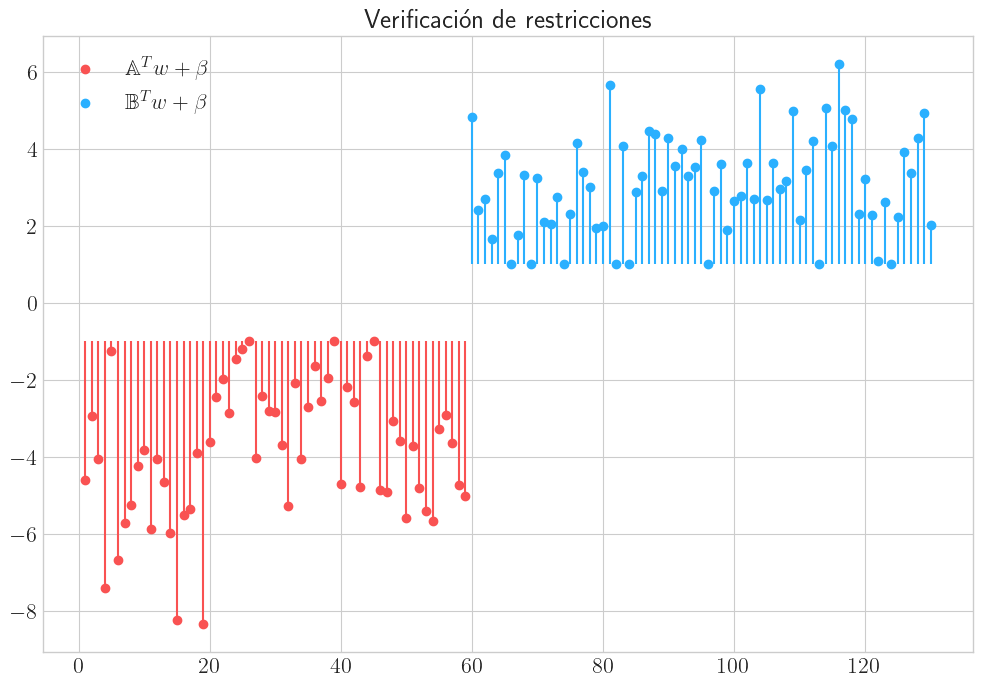

In [13]:
# graficar
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

myred = "#F95252"
myblue = "#2ab0ff"

fig, ax = plt.subplots(figsize=(12,8))
len_A = np.arange(len(AT_w))
ax.scatter(len_A+1, AT_w, c=myred, label=r"$\mathbb{A}^Tw+\beta$")
ax.scatter(np.arange(len(AT_w), len(BT_w)+len(AT_w))+1, BT_w, color=myblue, label=r"$\mathbb{B}^Tw+\beta$")
plt.vlines(len_A+1, ymin = AT_w, ymax = -1, colors=myred)
plt.vlines(np.arange(len(AT_w), len(BT_w)+len(AT_w))+1, ymin = 1, ymax = BT_w, colors=myblue)
ax.legend()
ax.set_title("Verificación de restricciones")
plt.savefig('outputs/AvsB.pdf', format='pdf')

## B y C

In [14]:
# s y r son el número de filas de A y B, respectivamente
# n es el número de columnas que tienen A y B y es el tamaño de nuestra w
(s, n) = X_C.shape
r = X_B.shape[0]

# Agregamos la variable de la beta
n += 1

Q = np.eye(n)
Q[-1][-1] = 0
c = np.zeros(n)
F = np.concatenate((-X_C, X_B))
aux = np.concatenate((-np.ones(s),np.ones(r)))
F = np.c_[F, aux]
d = np.ones(s+r)

w_hat,mu,z,iter = myqp_intpoint_proy(Q, F, c, d, verbose=True)

w = w_hat[:-1]
beta = w_hat[-1]

# valor de la función objetivo sin tomar en cuenta a beta
print(np.dot(w,w))

# beta
print(beta)

# Todos tendrían que ser <= -1
CT_w = np.dot(X_C, w) + beta

# Todos tendrían que ser >= 1
BT_w = np.dot(X_B, w) + beta

iter= 1 | ||cnpo||= 6384.645773312219
iter= 2 | ||cnpo||= 4544.974942943422
iter= 3 | ||cnpo||= 3245.762011301992
iter= 4 | ||cnpo||= 1766.2105431683399
iter= 5 | ||cnpo||= 925.4247999778838
iter= 6 | ||cnpo||= 401.62633331267926
iter= 7 | ||cnpo||= 183.94385837382936
iter= 8 | ||cnpo||= 60.58367931756964
iter= 9 | ||cnpo||= 29.531537399251622
iter= 10 | ||cnpo||= 1.4812009795488075
iter= 11 | ||cnpo||= 0.0977679533531054
iter= 12 | ||cnpo||= 0.03515128089188774
iter= 13 | ||cnpo||= 0.01888719260592094
iter= 14 | ||cnpo||= 0.010113206318280936
iter= 15 | ||cnpo||= 0.0053782901374030585
iter= 16 | ||cnpo||= 0.002846663426850382
iter= 17 | ||cnpo||= 0.0015024630036613558
iter= 18 | ||cnpo||= 0.0007918164163754401
iter= 19 | ||cnpo||= 0.000416935838672274
iter= 20 | ||cnpo||= 0.0002194092595684269
iter= 21 | ||cnpo||= 0.00011540832638862917
iter= 22 | ||cnpo||= 6.06789013682942e-05
iter= 23 | ||cnpo||= 3.1890720426534436e-05
iter= 24 | ||cnpo||= 1.6754543378258176e-05
iter= 25 | ||cnpo||=

C:\Users\betom\AppData\Local\Temp\ipykernel_18248\1570847987.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


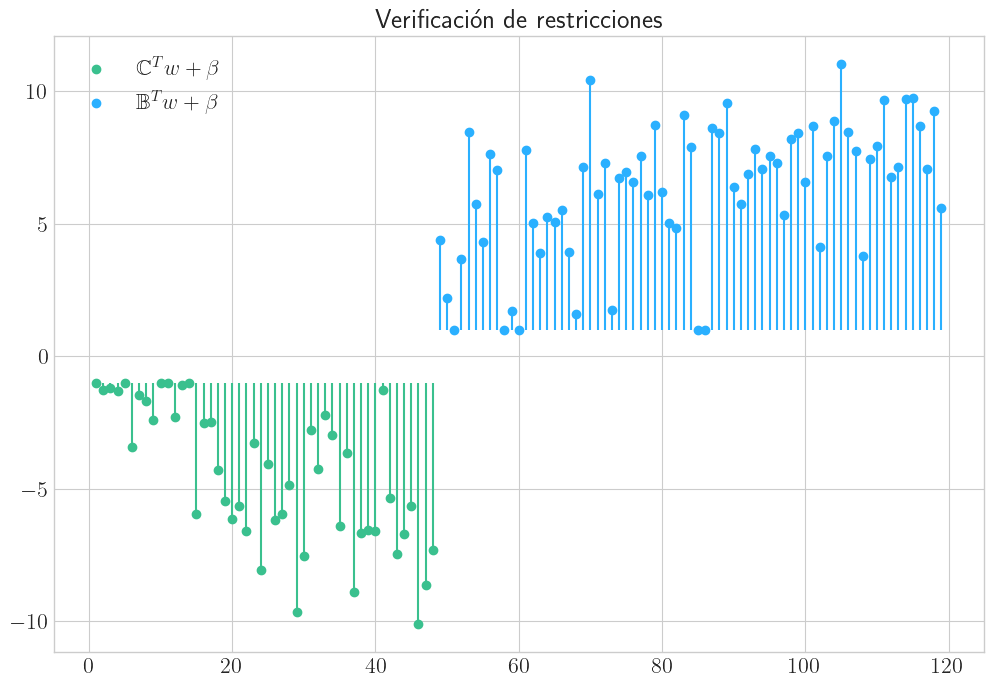

In [15]:
# graficar
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

mygreen = "#3AC08E"
myblue = "#2ab0ff"

fig, ax = plt.subplots(figsize=(12,8))
len_C = np.arange(len(CT_w))
ax.scatter(len_C+1, CT_w, c=mygreen, label=r"$\mathbb{C}^Tw+\beta$")
ax.scatter(np.arange(len(CT_w), len(BT_w)+len(CT_w))+1, BT_w, color=myblue, label=r"$\mathbb{B}^Tw+\beta$")
plt.vlines(len_C+1, ymin = CT_w, ymax = -1, colors=mygreen)
plt.vlines(np.arange(len(CT_w), len(BT_w)+len(CT_w))+1, ymin = 1, ymax = BT_w, colors=myblue)
ax.legend()
ax.set_title("Verificación de restricciones")
plt.savefig('outputs/CvsB.pdf', format='pdf')

## A vs C

In [16]:
# s y r son el número de filas de A y B, respectivamente
# n es el número de columnas que tienen A y B y es el tamaño de nuestra w
(s, n) = X_A.shape
r = X_C.shape[0]

# Agregamos la variable de la beta
n += 1

Q = np.eye(n)
Q[-1][-1] = 0
c = np.zeros(n)
F = np.concatenate((-X_A, X_C))
aux = np.concatenate((-np.ones(s),np.ones(r)))
F = np.c_[F, aux]
d = np.ones(s+r)

w_hat,mu,z,iter = myqp_intpoint_proy(Q, F, c, d, verbose=True)

w = w_hat[:-1]
beta = w_hat[-1]

# valor de la función objetivo sin tomar en cuenta a beta
print(np.dot(w,w))

# beta
print(beta)

# Todos tendrían que ser <= -1
AT_w = np.dot(X_A, w) + beta

# Todos tendrían que ser >= 1
CT_w = np.dot(X_C, w) + beta

iter= 1 | ||cnpo||= 18236.831580676848
iter= 2 | ||cnpo||= 4564.663814364974
iter= 3 | ||cnpo||= 1683.9035184682282
iter= 4 | ||cnpo||= 517.2210079817628
iter= 5 | ||cnpo||= 215.08570303706674
iter= 6 | ||cnpo||= 22.319005151994414
iter= 7 | ||cnpo||= 4.4967489646809575
iter= 8 | ||cnpo||= 0.227832771962287
iter= 9 | ||cnpo||= 0.02403914277588224
iter= 10 | ||cnpo||= 0.01224666614635154
iter= 11 | ||cnpo||= 0.0070151787771273386
iter= 12 | ||cnpo||= 0.003990627966058534
iter= 13 | ||cnpo||= 0.0029780102414332667
iter= 14 | ||cnpo||= 0.0015767232506199928
iter= 15 | ||cnpo||= 0.0008369078809891693
iter= 16 | ||cnpo||= 0.00044154301884219324
iter= 17 | ||cnpo||= 0.00023275664407231082
iter= 18 | ||cnpo||= 0.0001224794619240181
iter= 19 | ||cnpo||= 6.438371020876487e-05
iter= 20 | ||cnpo||= 3.382459622905542e-05
iter= 21 | ||cnpo||= 1.7764368641698952e-05
iter= 22 | ||cnpo||= 9.328083514897856e-06
0.5663484948951428
4.662352881449469


C:\Users\betom\AppData\Local\Temp\ipykernel_18248\1766683111.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


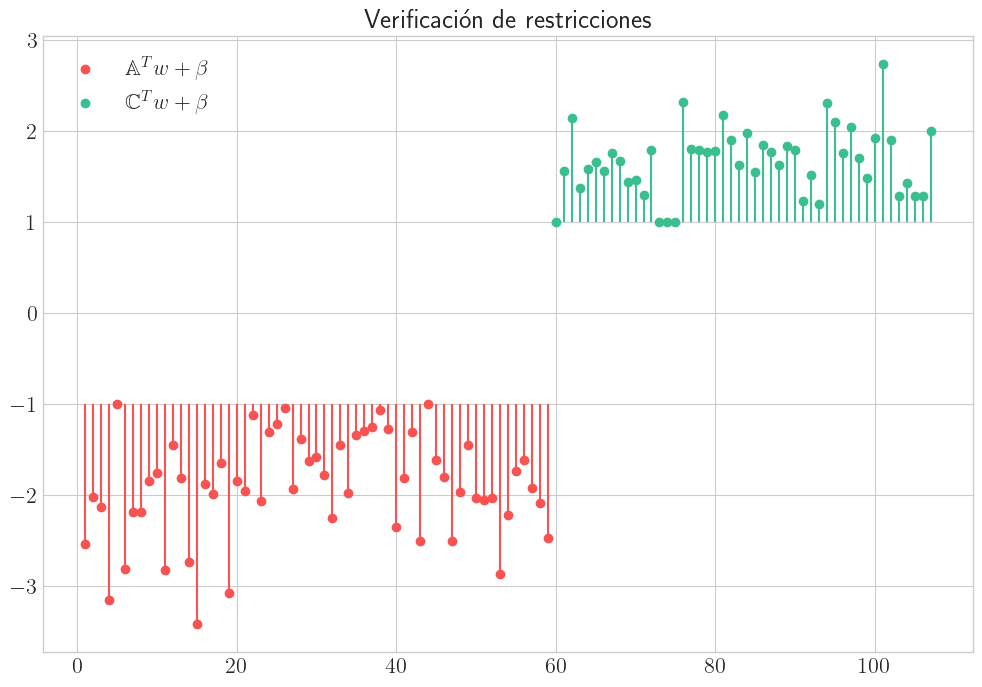

In [17]:
# graficar
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

fig, ax = plt.subplots(figsize=(12,8))
len_A = np.arange(len(AT_w))
ax.scatter(len_A+1, AT_w, c=myred, label=r"$\mathbb{A}^Tw+\beta$")
ax.scatter(np.arange(len(AT_w), len(CT_w)+len(AT_w))+1, CT_w, color=mygreen, label=r"$\mathbb{C}^Tw+\beta$")
plt.vlines(len_A+1, ymin = AT_w, ymax = -1, colors=myred)
plt.vlines(np.arange(len(AT_w), len(CT_w)+len(AT_w))+1, ymin = 1, ymax = CT_w, colors=mygreen)
ax.legend()
ax.set_title("Verificación de restricciones")
plt.savefig('outputs/AvsC.pdf', format='pdf')